In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
df=pd.read_csv('news.csv')

df.shape
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB
None


In [14]:
labels=df.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

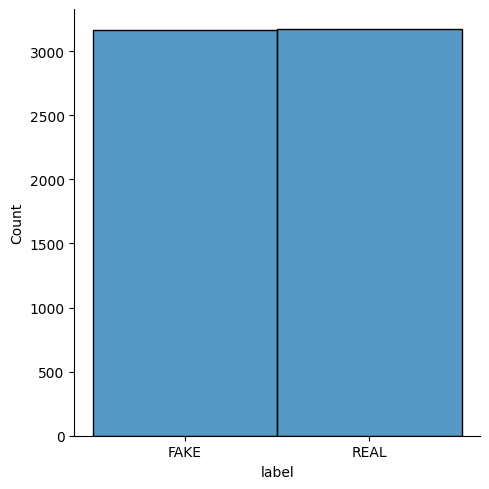

In [15]:
sns.displot(labels)

In [16]:
x_train,x_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.2, random_state=7)

In [17]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

In [18]:
pac=PassiveAggressiveClassifier(max_iter=50) #model goes through passiveaggressive classfier and is allowed to make maximum 50 iterations over the training dataset
pac.fit(tfidf_train,y_train) #fitting the model

y_pred=pac.predict(tfidf_test) #using predict method on the model after fitting the model.
score=accuracy_score(y_test,y_pred)

In [19]:
print(f'Accuracy: {round(score*100,2)}%')
print('\nSummary of perofrmance by Confusion matrix with no. of TP FN FP TN : ')

cm=confusion_matrix(y_test,y_pred, labels=['FAKE','REAL']) 
cm

Accuracy: 92.9%

Summary of perofrmance by Confusion matrix with no. of TP FN FP TN : 


array([[589,  49],
       [ 41, 588]], dtype=int64)

<AxesSubplot:>

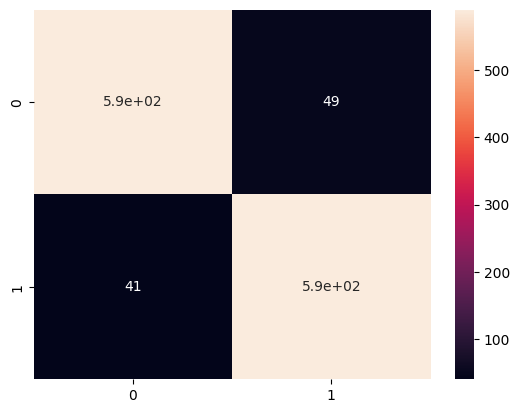

In [20]:
sns.heatmap(cm, annot=True)

<AxesSubplot:>

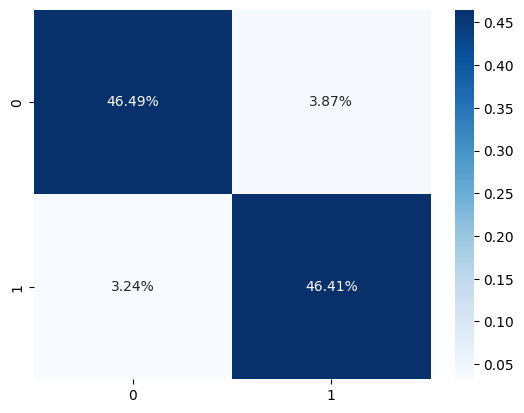

In [21]:
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')